> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#Import all packages needed
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [30]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [32]:
print(df.imdb_id.nunique())


10855


In [33]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [34]:
df['runtime'].value_counts()

90     547
95     358
100    335
93     328
97     306
      ... 
235      1
20       1
220      1
236      1
219      1
Name: runtime, Length: 247, dtype: int64

In [35]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [36]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [3]:
df_clean = df.copy()

### drop duplicates with same imdb_id 

In [4]:
df_clean.drop_duplicates(subset ="imdb_id",keep = False, inplace = True) 

### drop unuseful columns

In [5]:
df_clean.drop(['homepage','tagline', 'overview','keywords', 'release_date','imdb_id'], axis=1, inplace=True)
# dropping ALL duplicte values 


In [6]:
df_clean.dropna(inplace=True)

In [41]:
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9769.000000,9769.000000,9.769000e+03,9.769000e+03,9769.000000,9769.000000,9769.000000,9769.000000,9.769000e+03,9.769000e+03
mean,63192.733340,0.694785,1.618157e+07,4.424469e+07,102.940731,239.366465,5.963487,2000.875832,1.941888e+07,5.707052e+07
std,90729.599166,1.037080,3.221455e+07,1.226053e+08,27.866706,603.095796,0.913202,13.037951,3.567057e+07,1.514699e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10220.000000,0.232574,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18674.000000,0.419759,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,70577.000000,0.776493,1.925000e+07,3.106304e+07,112.000000,173.000000,6.600000,2011.000000,2.462579e+07,4.313360e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df_clean.replace(0,df_clean.mean(axis=0),inplace=True)


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9769 non-null   int64  
 1   popularity            9769 non-null   float64
 2   budget                9769 non-null   float64
 3   revenue               9769 non-null   float64
 4   original_title        9769 non-null   object 
 5   cast                  9769 non-null   object 
 6   director              9769 non-null   object 
 7   runtime               9769 non-null   float64
 8   genres                9769 non-null   object 
 9   production_companies  9769 non-null   object 
 10  vote_count            9769 non-null   int64  
 11  vote_average          9769 non-null   float64
 12  release_year          9769 non-null   int64  
 13  budget_adj            9769 non-null   float64
 14  revenue_adj           9769 non-null   float64
dtypes: float64(7), int64

## Seperating columns with several values
### source: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/


In [8]:

cast = (df_clean['cast'].str.split('|', expand=True).rename(columns=lambda x: {x+1}))
director = (df_clean['director'].str.split('|', expand=True).rename(columns=lambda x: {x+1}))
genres= (df_clean['genres'].str.split('|', expand=True).rename(columns=lambda x: {x+1}))
production_companies = (df_clean['production_companies'].str.split('|', expand=True).rename(columns=lambda x: {x+1}))

In [9]:
def separate(data):
    return data.str[0:].str.split('|',expand = True)
genres = separate(df_clean['genres'])
director = separate(df_clean['director'])
cast = separate(df_clean['cast'])
production_companies = separate(df_clean['production_companies'])

In [33]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast_1  9769 non-null   object
 1   cast_2  9685 non-null   object
 2   cast_3  9632 non-null   object
 3   cast_4  9563 non-null   object
 4   cast_5  9356 non-null   object
dtypes: object(5)
memory usage: 777.9+ KB


## melt the extracted values to one column with the movie id
### https://github.com/pooja2512/Investigate-a-Dataset/blob/master/Investigate_TMDb_Dataset.ipynb

In [11]:
genres['id'] = df_clean['id']
cast['id'] = df_clean['id']
production_companies['id'] = df_clean['id']
director['id'] =  df_clean['id']

In [12]:
def melt_df(data ):
    return pd.melt(data,col_level = 0,id_vars = 'id',value_vars = [0,1,2,3,4]) #keep id column apply merge on rest of the columns

genres=melt_df(genres)
cast = melt_df(cast)
director = melt_df(director)
production_companies = melt_df(production_companies)

In [13]:
grouped_df = [genres,cast,director,production_companies]
for df in grouped_df:
    df.columns = ['id','variable','value']
    df.drop(df.columns[1],axis=1, inplace=True)

In [22]:
cast

,id,value
0,135397,Chris Pratt
1,76341,Tom Hardy
2,262500,Shailene Woodley
3,140607,Harrison Ford
4,168259,Vin Diesel
...,...,...
48840,21,Chip Fitzwater
48841,20379,Brian Bedford
48842,39768,Lyubov Dobrzhanskaya
48843,21449,Tadao Nakamaru


In [29]:
df_clean=df_clean.drop(columns = ['cast','director','production_companies', 'genres'],axis = 1)


In [30]:
df_clean

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,119.0,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,136.0,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,137.0,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,1.618157e+07,4.424469e+07,The Endless Summer,95.0,11,7.4,1966,1.941888e+07,5.707052e+07
10862,20379,0.065543,1.618157e+07,4.424469e+07,Grand Prix,176.0,20,5.7,1966,1.941888e+07,5.707052e+07
10863,39768,0.065141,1.618157e+07,4.424469e+07,Beregis Avtomobilya,94.0,11,6.5,1966,1.941888e+07,5.707052e+07
10864,21449,0.064317,1.618157e+07,4.424469e+07,"What's Up, Tiger Lily?",80.0,22,5.4,1966,1.941888e+07,5.707052e+07


In [31]:
df_clean.isnull().sum()


id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 0 to 10865
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9769 non-null   int64  
 1   popularity              9769 non-null   float64
 2   budget                  9769 non-null   float64
 3   revenue                 9769 non-null   float64
 4   original_title          9769 non-null   object 
 5   runtime                 9769 non-null   float64
 6   vote_count              9769 non-null   int64  
 7   vote_average            9769 non-null   float64
 8   release_year            9769 non-null   int64  
 9   budget_adj              9769 non-null   float64
 10  revenue_adj             9769 non-null   float64
 11  cast_1                  9769 non-null   object 
 12  cast_2                  9685 non-null   object 
 13  cast_3                  9632 non-null   object 
 14  cast_4                  9563 non-null  

<a id='eda'></a>
## Exploratory Data Analysis



### Top 10 Movies

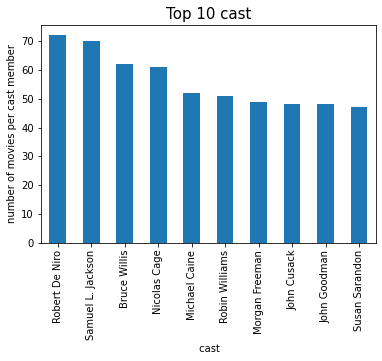

In [25]:
cast['value'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('number of movies per cast member')
plt.title('Top 10 cast', size=15)
plt.xlabel(' cast')
plt.savefig('top_ten_cast_members');

### Top 10 production companies 

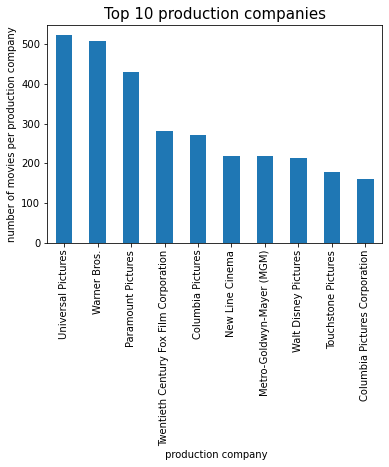

In [51]:
production_companies['value'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('number of movies per production company')
plt.title('Top 10 production companies', size=15)
plt.xlabel(' production company')
plt.savefig('top_ten_production_companies');

### Top 10 directors 

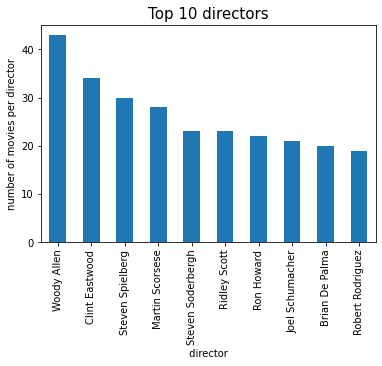

In [49]:
director['value'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('number of movies per director')
plt.title('Top 10 directors', size=15)
plt.xlabel(' director ')
plt.savefig('top_ten_directors');

### Top 10 generes

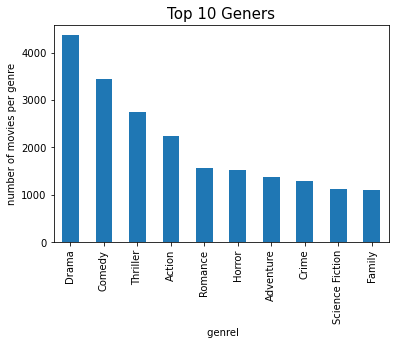

In [48]:
genres['value'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('number of movies per genre')
plt.title('Top 10 Geners', size=15)
plt.xlabel(' genrel')
plt.savefig('top_ten_genres');

### Calculate Gross Profit

In [14]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_clean['gross_profit_adj'] = df_clean['revenue_adj'].sub(df_clean['budget_adj'],axis = 'index')


### Effect of number of votes on the rates

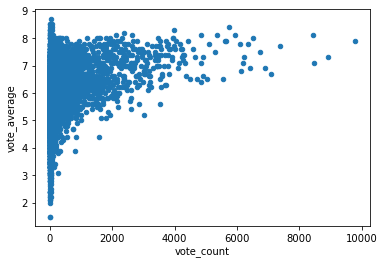

In [47]:
df_votes_avg_count = df_clean.loc[:, 'vote_count' : 'vote_average']
df_votes_avg_count.plot(x='vote_count', y='vote_average', kind='scatter');


### Relation between popularity & gross profit

<Figure size 864x648 with 0 Axes>

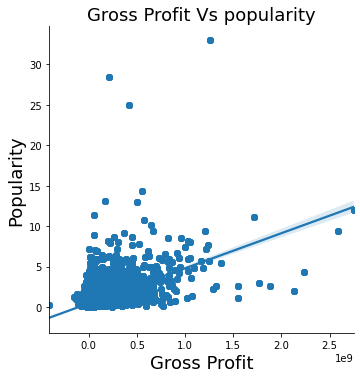

In [44]:
df_movies_generes = pd.merge(df_clean , genres , how = 'inner' , on = 'id')
plt.figure(figsize = (12,9));
sns.lmplot(x = 'gross_profit_adj' , y = 'popularity', data = df_movies_generes);
plt.xlabel('Gross Profit' , fontsize = 18);
plt.ylabel('Popularity', fontsize =18);
plt.title('Gross Profit Vs popularity',fontsize = 18);

### Movies per year

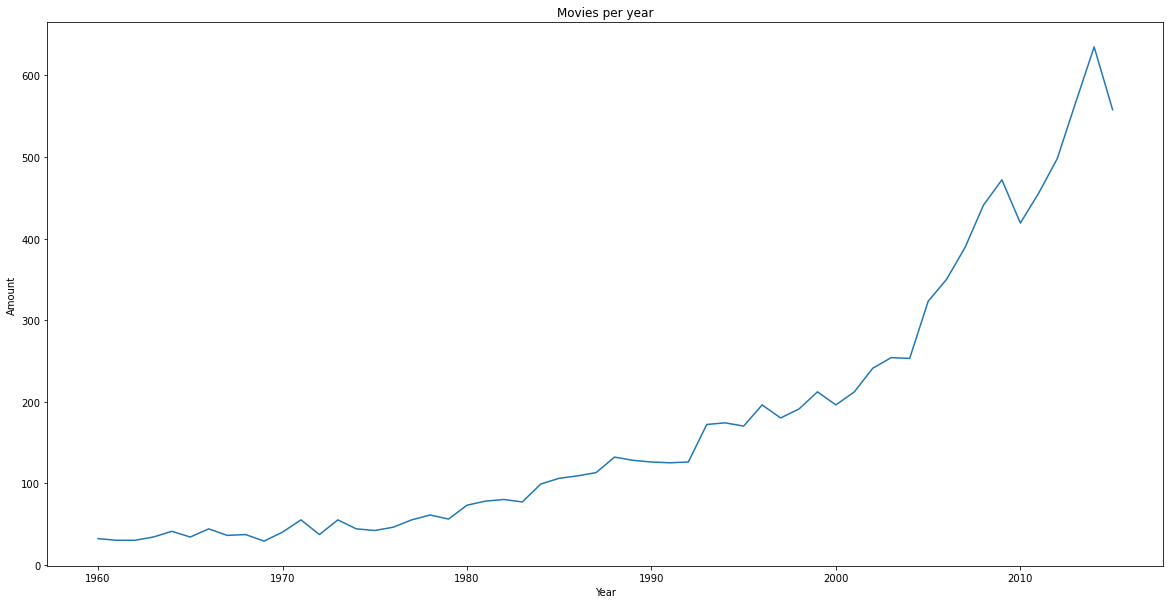

In [56]:
movies_per_year = df_clean.groupby('release_year').size();
movies_per_year.plot(x='release_year', y='movies_count', kind='line', figsize=(20,10), title="Movies per year", label="Amount of movies", )
plt.xlabel('Year')
plt.ylabel('Amount');


### biggest budget movies by year

In [15]:
### https://stackoverflow.com/questions/51775601/cannot-access-callable-attribute-sort-values-of-dataframegroupby-objects-t
movies_by_budget = df_clean.groupby('release_year')
movies_by_budget.apply(lambda _df: _df.sort_values(by = 'budget_adj',ascending = False)['original_title'].head(1))

release_year       
1960          10143                                      Spartacus
1961          10130                                 One-Eyed Jacks
1962          9856                            How the West Was Won
1963          10443                                      Cleopatra
1964          9887                                    My Fair Lady
1965          10716                   The Greatest Story Ever Told
1966          10824                 The Bible: In the Beginning...
1967          10409                                The Dirty Dozen
1968          9719                           2001: A Space Odyssey
1969          10730                              Battle of Britain
1970          10656                              Tora! Tora! Tora!
1971          9931                        Bedknobs and Broomsticks
1972          7269                                   The Godfather
1973          10593                                     Robin Hood
1974          9785                        

<a id='conclusions'></a>
## Conclusions



### 1- The movies with more votes gets higher rates

### 2- The more popular movies have more Gross profit

### 3- Drama is the most common genre in the movies

### 4- Director Woody Allen directed the highest number of movies

### 5- Universal Pictures production company have the highest number of movies

### 6- Actor Robert De niro made the highest number of movies

### 7- Number of movies increased rapidly through the years